In [2]:
import os
import json
import pandas as pd

# Define the base directory containing evaluation results
base_dir = "results/evaluations"

# Initialize an empty list to store all model results
all_results = []

# Iterate through each model type (classical_ml, lstm, mlp, transformer)
for model_type in os.listdir(base_dir):
    model_dir = os.path.join(base_dir, model_type)
    
    # Iterate through each JSON file in the model directory
    for file_name in os.listdir(model_dir):
        if file_name.endswith(".json"):
            file_path = os.path.join(model_dir, file_name)
            
            # Load the JSON data
            with open(file_path, "r") as f:
                data = json.load(f)
            
            # Extract relevant information based on model type
            if model_type in ["classical_ml", "zero_shot", "literature"]:
                # For classical ML, the JSON file directly contains the classification report
                classification_report = data
                model_name = file_name.replace(".json", "")
                train_time = None  # Not applicable for classical ML
                num_parameters = None  # Not applicable for classical ML
                config = {}  # Not applicable for classical ML
            elif model_type == "statistical":
                classification_report = data["classification_report"]
                train_time = None  # Not applicable for classical ML
                num_parameters = None  # Not applicable for classical ML
                config = {}  # Not applicable for classical ML
                model_name = file_name.replace(".json", "")


            elif model_type in ["transformer"]:
                # For transformer, the classification report is at the top level
                classification_report = data["classification_report"]
                model_name = data["config"]["model_name"]
                train_time = data.get("execution_time", None)
                num_parameters = data.get("model_size", None)  # Use "model_size" for transformer
                config = data.get("config", {})
            else:
                # For lstm and mlp, the classification report is nested
                classification_report = data[model_type]["classification_report"]
                model_name = data[model_type]["config"]["model_name"]
                train_time = data[model_type].get("execution_time", None)
                num_parameters = data[model_type].get("num_parameters", None)
                config = data[model_type].get("config", {})
            
            # Extract metrics for each language
            for language, metrics in classification_report.items():
                if language in ["accuracy", "macro avg", "weighted avg"]:
                    continue  # Skip these for now, handle them separately
                
                # Ensure metrics is a dictionary
                if not isinstance(metrics, dict):
                    print(f"Skipping invalid metrics for {model_type}/{model_name}/{language}: {metrics}")
                    continue
                
                # Create a dictionary for the current language and model
                result = {
                    "model_type": model_type,
                    "model_name": model_name,
                    "language": language,
                    "precision": metrics.get("precision", None),
                    "recall": metrics.get("recall", None),
                    "f1_score": metrics.get("f1-score", None),
                    "support": metrics.get("support", None),
                    "train_time": train_time,
                    "num_parameters": num_parameters,
                    **config  # Add config parameters as columns
                }
                
                # Append the result to the list
                all_results.append(result)
            
            # Add macro, weighted, and accuracy metrics (if they exist)
            if "macro avg" in classification_report and isinstance(classification_report["macro avg"], dict):
                result = {
                    "model_type": model_type,
                    "model_name": model_name,
                    "language": "macro_avg",
                    "precision": classification_report["macro avg"].get("precision", None),
                    "recall": classification_report["macro avg"].get("recall", None),
                    "f1_score": classification_report["macro avg"].get("f1-score", None),
                    "support": classification_report["macro avg"].get("support", None),
                    "train_time": train_time,
                    "num_parameters": num_parameters,
                    **config
                }
                all_results.append(result)
            
            if "weighted avg" in classification_report and isinstance(classification_report["weighted avg"], dict):
                result = {
                    "model_type": model_type,
                    "model_name": model_name,
                    "language": "weighted_avg",
                    "precision": classification_report["weighted avg"].get("precision", None),
                    "recall": classification_report["weighted avg"].get("recall", None),
                    "f1_score": classification_report["weighted avg"].get("f1-score", None),
                    "support": classification_report["weighted avg"].get("support", None),
                    "train_time": train_time,
                    "num_parameters": num_parameters,
                    **config
                }
                all_results.append(result)
            
            if "accuracy" in classification_report:
                result = {
                    "model_type": model_type,
                    "model_name": model_name,
                    "language": "accuracy",
                    "precision": None,
                    "recall": None,
                    "f1_score": None,
                    "support": None,
                    "train_time": train_time,
                    "num_parameters": num_parameters,
                    **config
                }
                result["accuracy"] = classification_report.get("accuracy", None)
                all_results.append(result)

# Convert the list of results into a DataFrame
df = pd.DataFrame(all_results)

# Reorder columns for better readability
columns = [
    "model_type", "model_name", "language", "precision", "recall", "f1_score", "support", "accuracy",
    "train_time", "num_parameters", "embedding_dim", "hidden_dim", "n_layers", "bidirectional",
    "dropout", "lr", "n_epochs", "patience", "min_delta", "batch_size"
]
df = df[columns]

# Display the DataFrame
df

Skipping invalid metrics for classical_ml/svm_tfidf_feature_importance/top_features: [['ı', 0.4231782987015388], ['aa', 0.3932107611461239], [' ', 0.39171386096884847], ['é', 0.36371791078651033], ['，', 0.34099740006021206], ['ä', 0.33135934120473265], ['o ', 0.3221478503530446], ['ă', 0.31801519836385733], ['o', 0.3155157913261962], ['u', 0.3130643120319707], ['k', 0.31294460288856435], [' d', 0.31010988024476355], ['e ', 0.3063902828628507], ['i', 0.3027190438660906], ['n ', 0.3008210692775386], ['ae', 0.2963801121033525], ['m ', 0.2951157157680497], ['en ', 0.295092785054714], ['t ', 0.29265263358602356], ['i ', 0.2899750480136756]]
Skipping invalid metrics for classical_ml/svm_tfidf_feature_importance/model_type: LinearSVC
Skipping invalid metrics for classical_ml/svm_unigram_feature_importance/top_features: [['õ', 0.4668630613863425], ['ã', 0.3759059811797853], ['ă', 0.28368601162168594], ['ú', 0.2549355663117019], ['—', 0.25233816361089156], ['å', 0.2520919480362557], ['à', 0.231

,model_type,model_name,language,precision,recall,f1_score,support,accuracy,train_time,num_parameters,embedding_dim,hidden_dim,n_layers,bidirectional,dropout,lr,n_epochs,patience,min_delta,batch_size
0,lstm,lstm_language_detector,Arabic,1.000000,0.995000,0.997494,200.0,NaN,79.300583,4774930.0,300.0,256.0,2.0,True,0.3,0.001,40.0,5.0,1e-4,64.0
1,lstm,lstm_language_detector,Chinese,0.990050,0.995000,0.992519,200.0,NaN,79.300583,4774930.0,300.0,256.0,2.0,True,0.3,0.001,40.0,5.0,1e-4,64.0
2,lstm,lstm_language_detector,Dutch,0.989899,0.980000,0.984925,200.0,NaN,79.300583,4774930.0,300.0,256.0,2.0,True,0.3,0.001,40.0,5.0,1e-4,64.0
3,lstm,lstm_language_detector,English,0.798319,0.950000,0.867580,200.0,NaN,79.300583,4774930.0,300.0,256.0,2.0,True,0.3,0.001,40.0,5.0,1e-4,64.0
4,lstm,lstm_language_detector,Estonian,0.974359,0.950000,0.962025,200.0,NaN,79.300583,4774930.0,300.0,256.0,2.0,True,0.3,0.001,40.0,5.0,1e-4,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,mlp,mlp_language_detector,Turkish,0.915344,0.865000,0.889460,200.0,NaN,20.314758,17571474.0,300.0,NaN,NaN,NaN,0.3,0.001,30.0,5.0,1e-4,64.0
428,mlp,mlp_language_detector,Urdu,0.918660,0.960000,0.938875,200.0,NaN,20.314758,17571474.0,300.0,NaN,NaN,NaN,0.3,0.001,30.0,5.0,1e-4,64.0
429,mlp,mlp_language_detector,macro_avg,0.843976,0.836364,0.837327,4400.0,NaN,20.314758,17571474.0,300.0,NaN,NaN,NaN,0.3,0.001,30.0,5.0,1e-4,64.0
430,mlp,mlp_language_detector,weighted_avg,0.843976,0.836364,0.837327,4400.0,NaN,20.314758,17571474.0,300.0,NaN,NaN,NaN,0.3,0.001,30.0,5.0,1e-4,64.0


In [3]:
df['model_name'].value_counts()

model_name
lstm_language_detector                                                                                      25
markov_chain                                                                                                25
char_freq                                                                                                   25
ngram_1                                                                                                     25
ngram_3                                                                                                     25
zero_shot_gpt_report                                                                                        25
cavnar_trenkle_classification_report                                                                        25
dunning_classification_report                                                                               25
/home/v_rahimzadeh/hf_models/models--xlm-roberta-base/snapshots/e73636d4f797dec63c3081bb6ed5c7b0bb3f2

In [4]:
df = df[df['model_name'] != "training_results"]

In [5]:
df['model_name'].value_counts()

model_name
lstm_language_detector                                                                                      25
markov_chain                                                                                                25
char_freq                                                                                                   25
ngram_1                                                                                                     25
ngram_3                                                                                                     25
zero_shot_gpt_report                                                                                        25
cavnar_trenkle_classification_report                                                                        25
dunning_classification_report                                                                               25
/home/v_rahimzadeh/hf_models/models--xlm-roberta-base/snapshots/e73636d4f797dec63c3081bb6ed5c7b0bb3f2

In [6]:
model_name_dict = {
    "/home/v_rahimzadeh/hf_models/models--xlm-roberta-base/snapshots/e73636d4f797dec63c3081bb6ed5c7b0bb3f2089": "XLM-Roberta-Finetuned",
    "lstm_language_detector":"LSTM",
    "zero_shot_gpt_report": "Llama-3.1-8B-Instruct",
    "dunning_classification_report": "Dunning",
    "cavnar_trenkle_classification_report": "Cavnar Trenkle",
    "svm_tfidf_classification_report":"SVM-TFIDF",
    "svm_unigram_classification_report":"SVM-Unigram",
    "lr_tfidf_classification_report": "Logistic Regression-TFIDF",
    "rf_tfidf_classification_report":"Random Forrest-TFIDF",
    "nb_bigram_classification_report": "Naive Bayes Bigram",
    "nb_unigram_classification_report": "Naive Bayes Unigram",
    "nb_tfidf_classification_report": "Naive Bayes-TFIDF",
    "mlp_language_detector":"MLP",
    "ngram_3":"Trigram LM",
    "ngram_1":"Unigram LM",
    
    "char_freq":"Char Freq",
    "markov_chain": "Markov Chain"
}

df['model_name'] = df['model_name'].map(model_name_dict)

/tmp/ipykernel_1224360/164641127.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_name'] = df['model_name'].map(model_name_dict)


In [7]:
df['model_name'].value_counts()

model_name
LSTM                         25
Markov Chain                 25
Char Freq                    25
Unigram LM                   25
Trigram LM                   25
Llama-3.1-8B-Instruct        25
Cavnar Trenkle               25
Dunning                      25
XLM-Roberta-Finetuned        25
SVM-Unigram                  25
Naive Bayes Bigram           25
Logistic Regression-TFIDF    25
SVM-TFIDF                    25
Naive Bayes-TFIDF            25
Naive Bayes Unigram          25
Random Forrest-TFIDF         25
MLP                          25
Name: count, dtype: int64

In [8]:
df[df['model_type']=='statistical']

,model_type,model_name,language,precision,recall,f1_score,support,accuracy,train_time,num_parameters,embedding_dim,hidden_dim,n_layers,bidirectional,dropout,lr,n_epochs,patience,min_delta,batch_size
25,statistical,Markov Chain,Arabic,0.000000,0.000000,0.000000,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,statistical,Markov Chain,Chinese,0.000000,0.000000,0.000000,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,statistical,Markov Chain,Dutch,0.570588,0.970000,0.718519,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,statistical,Markov Chain,English,0.604863,0.995000,0.752363,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,statistical,Markov Chain,Estonian,0.628676,0.855000,0.724576,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,statistical,Trigram LM,Turkish,0.000000,0.000000,0.000000,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,statistical,Trigram LM,Urdu,0.000000,0.000000,0.000000,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,statistical,Trigram LM,macro_avg,0.046534,0.010455,0.015121,4400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,statistical,Trigram LM,weighted_avg,0.046534,0.010455,0.015121,4400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.index = df['model_name']

<Axes: xlabel='model_name'>

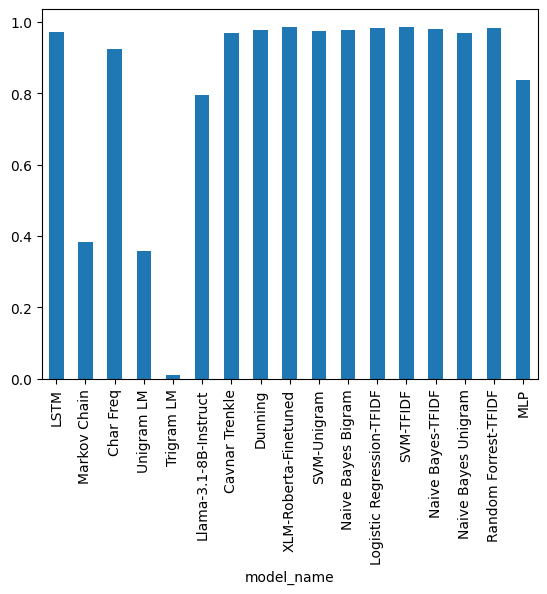

In [10]:
accuracies = df[df['accuracy'].notna()]

accuracies['accuracy'].plot(kind='bar')

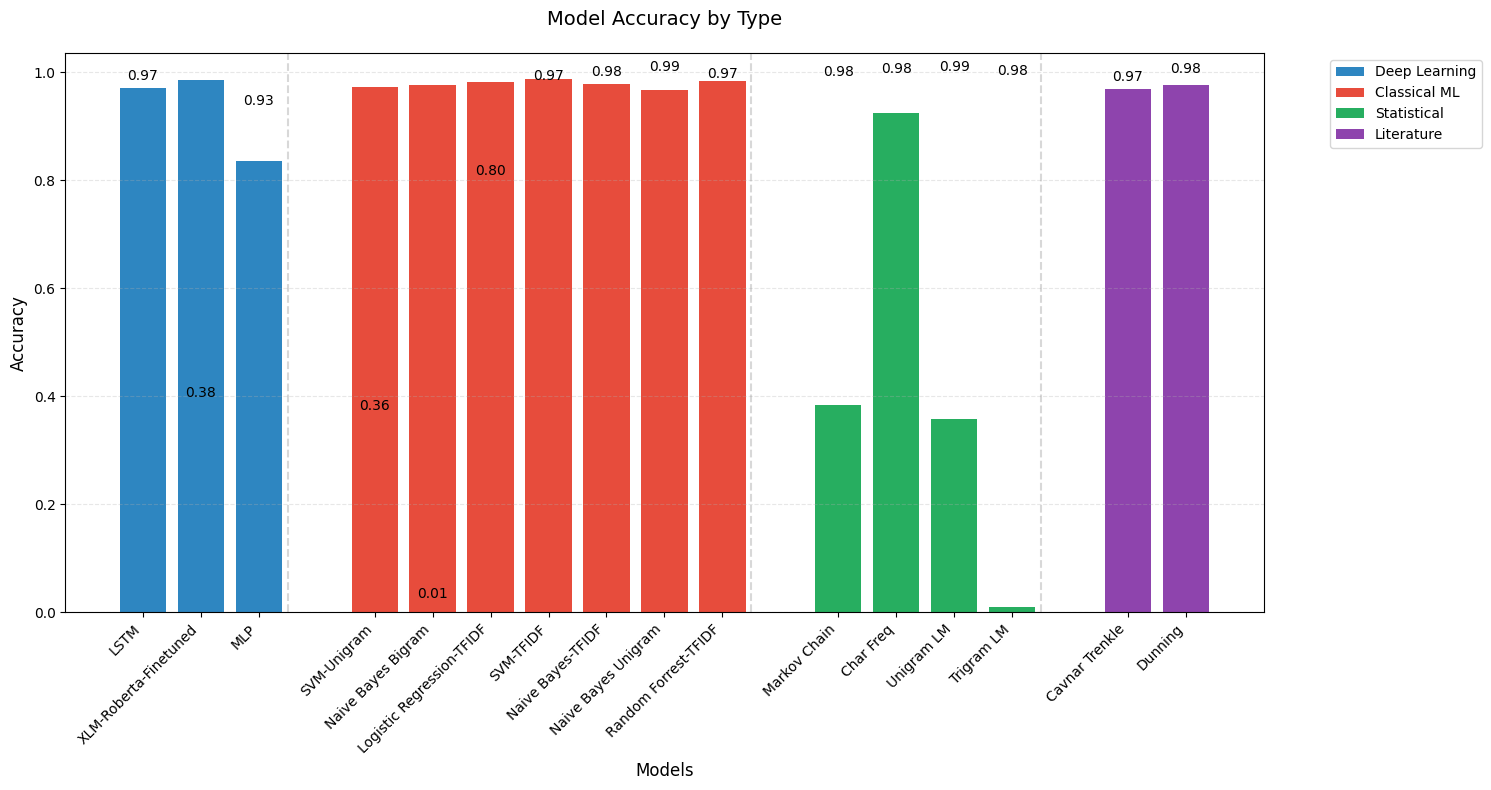

In [11]:
import matplotlib.pyplot as plt
import pandas.plotting
import seaborn as sns
import numpy as np

# First, let's create a dictionary for model types
model_types = {
    'Deep Learning': ['XLM-Roberta-Finetuned', 'MLP', 'LSTM'],
    'Classical ML': ['Naive Bayes Bigram', 'Naive Bayes Unigram', 'Naive Bayes-TFIDF', 
                    'SVM-TFIDF', 'SVM-Unigram', 'Logistic Regression-TFIDF', 'Random Forrest-TFIDF'],
    'Statistical': ['Char Freq', 'Trigram LM', 'Unigram LM', 'Markov Chain'],
    'Literature': ['Dunning', 'Cavnar Trenkle']
}

# Add model type column to the dataframe
def get_model_type(model_name):
    for type_name, models in model_types.items():
        if model_name in models:
            return type_name
    return 'Other'

# Filter out NaN values first
df_clean = df[df['accuracy'].notna()].copy()
df_clean['model_type'] = df_clean['model_name'].apply(get_model_type)

# Create the plot
plt.figure(figsize=(15, 8))

# Define distinct colors for each group
colors = {
    'Deep Learning': '#2E86C1',    # Blue
    'Classical ML': '#E74C3C',     # Red
    'Statistical': '#27AE60',      # Green
    'Literature': '#8E44AD'        # Purple
}

# Create grouped bar chart
x_positions = []
x_labels = []
group_boundaries = []
width = 0.8
current_x = 0

for type_name in model_types.keys():
    mask = df_clean['model_type'] == type_name
    group_data = df_clean[mask]
    
    if not group_data.empty:
        plt.bar(range(current_x, current_x + len(group_data)), 
                group_data['accuracy'], 
                width=width, 
                label=type_name,
                color=colors[type_name])
        
        x_positions.extend(range(current_x, current_x + len(group_data)))
        x_labels.extend(group_data['model_name'])
        group_boundaries.append(current_x + len(group_data))
        current_x += len(group_data) + 1  # Add 1 for spacing between groups

# Add vertical lines to separate groups
for boundary in group_boundaries[:-1]:  # Don't add line after the last group
    plt.axvline(x=boundary - 0.5, color='gray', linestyle='--', alpha=0.3)

# Customize the plot
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy by Type', fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set x-axis ticks and labels
plt.xticks(x_positions, x_labels, rotation=45, ha='right')

# Add value labels on top of bars
for i, v in zip(x_positions, df_clean['accuracy']):
    if not np.isnan(v):  # Only add label if value is not NaN
        plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()


In [17]:
subset_df = df_clean[['accuracy']]

subset_df.head()

,accuracy
model_name,
LSTM,0.971136
Markov Chain,0.383409
Char Freq,0.925000
Unigram LM,0.358636
Trigram LM,0.010455


In [18]:
subset_df.to_dict()

{'accuracy': {'LSTM': 0.9711363636363637,
  'Markov Chain': 0.3834090909090909,
  'Char Freq': 0.925,
  'Unigram LM': 0.35863636363636364,
  'Trigram LM': 0.010454545454545454,
  'Llama-3.1-8B-Instruct': 0.7953997908995863,
  'Cavnar Trenkle': 0.9695454545454546,
  'Dunning': 0.9770454545454546,
  'XLM-Roberta-Finetuned': 0.9868181818181818,
  'SVM-Unigram': 0.9736363636363636,
  'Naive Bayes Bigram': 0.9772727272727273,
  'Logistic Regression-TFIDF': 0.9831818181818182,
  'SVM-TFIDF': 0.9870454545454546,
  'Naive Bayes-TFIDF': 0.9793181818181819,
  'Naive Bayes Unigram': 0.9681818181818181,
  'Random Forrest-TFIDF': 0.9836363636363636,
  'MLP': 0.8363636363636363}}

In [14]:
from openai import OpenAI
client = OpenAI(
    base_url="http://localhost:8000/v1",
    api_key="token-abc123",
)

completion = client.chat.completions.create(
  model="/home/v_rahimzadeh/hf_models/models--meta-llama--Llama-3.1-8B-Instruct/snapshots/0e9e39f249a16976918f6564b8830bc894c89659",
  messages=[
{"role": "user", "content": "Hello!"}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content="Hello! It's nice to meet you. Is there something I can help you with or would you like to chat?", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=[])


In [15]:
from langchain_openai import ChatOpenAI
import yaml 

config_path = "/home/v_rahimzadeh/language-identification/configs.yaml"
with open(config_path, 'r') as f:
    configs = yaml.safe_load(f)


llm = ChatOpenAI(
            model_name=configs['zero_shot']['model_name'],
            openai_api_key="EMPTY",
            # base_url="http://0.0.0.0:8000/v1",
            openai_api_base=configs['zero_shot']['api_base'],
            temperature=0
        )

llm.invoke("Hi")

AIMessage(content="It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 36, 'total_tokens': 59, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': '/home/v_rahimzadeh/hf_models/models--meta-llama--Llama-3.1-8B-Instruct/snapshots/0e9e39f249a16976918f6564b8830bc894c89659', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-b9c215c6-d03d-4cdd-82d5-214779f43fa6-0', usage_metadata={'input_tokens': 36, 'output_tokens': 23, 'total_tokens': 59, 'input_token_details': {}, 'output_token_details': {}})

In [16]:
configs['zero_shot']['model_name']

'/home/v_rahimzadeh/hf_models/models--meta-llama--Llama-3.1-8B-Instruct/snapshots/0e9e39f249a16976918f6564b8830bc894c89659'